In [1574]:
# Necessary imports

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

#### We will predict the risk of Atherosclerotic cardiovascular disease, otherwise known as ASCVD. Currently, ASCVD- related conditions remain the leading cause of morbidity and mortality globally. 

In [1575]:
df = pd.read_csv("heartRisk.csv")

#### Exploratory analysis


In [1576]:
df.head(5)

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,49,101,181,32,11.1
1,0,0,0,1,1,69,167,155,59,30.1
2,0,1,1,1,1,50,181,147,59,37.6
3,1,1,1,1,0,42,145,166,46,13.2
4,0,0,1,0,1,66,134,199,63,15.1


In [1577]:
df.shape

(1000, 10)

In [1578]:
df.isna().sum()

isMale            0
isBlack           0
isSmoker          0
isDiabetic        0
isHypertensive    0
Age               0
Systolic          0
Cholesterol       0
HDL               0
Risk              0
dtype: int64

In [1579]:
numerical_features = df.columns[5:]
categorical_features = df.columns.drop(numerical_features)

# All of our categorical features are already binary encoded

In [1580]:
df[numerical_features].describe()

# The dataset appears to represent a population with a diverse range of ages and cardiovascular health indicators
# On average, individuals in the dataset may be at a moderate level of ASCVD risk, based on the intermediate risk threshold (7.5 to 20) 
# sourced from the internet

,Age,Systolic,Cholesterol,HDL,Risk
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,59.107000,144.249000,164.043000,59.603000,19.667000
std,11.536492,31.774528,20.329891,23.863505,17.043941
min,40.000000,90.000000,130.000000,20.000000,0.100000
25%,49.000000,117.000000,146.000000,39.000000,6.300000
50%,59.000000,144.000000,164.000000,59.000000,14.400000
75%,69.000000,171.000000,182.000000,81.000000,29.000000
max,79.000000,200.000000,200.000000,100.000000,85.400000


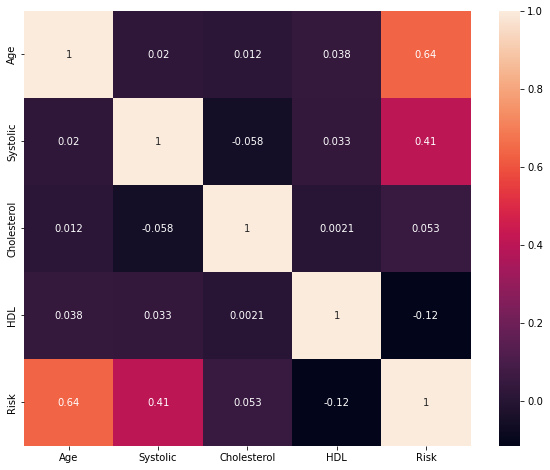

In [1581]:
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True)
plt.show()

# We can see that there are no strong correlations between features, which can be beneficial for our 
# model, as it allows each variable to provide unique information without redundancy

# However, there is a strong correlation between the feature "Age" and the target variable, which may 
# indicate that age has the biggest influence on our target value. The second strongest correlation is 
# the correlation between feature "Systolic" and our target, but this correlation is way weaker

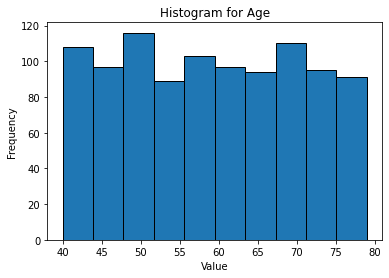

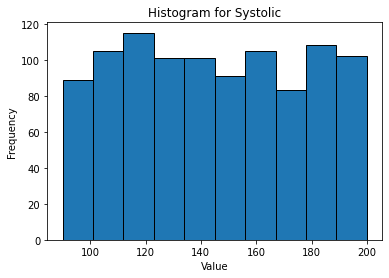

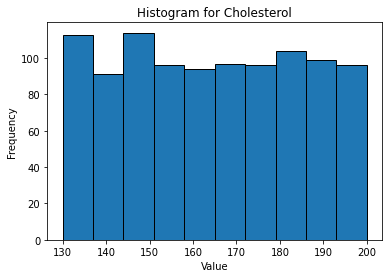

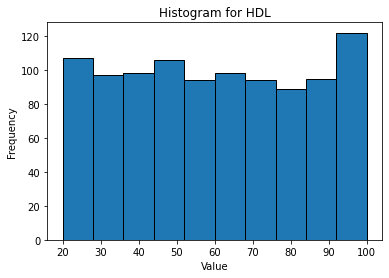

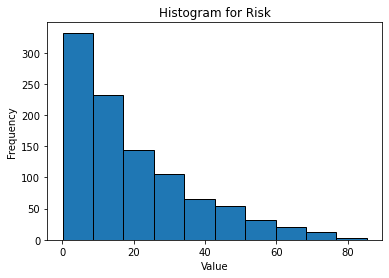

In [1582]:
for numerical_feature in df[numerical_features]:
    plt.hist(df[numerical_feature], edgecolor="black")
    plt.title(f'Histogram for {numerical_feature}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

# It is visible, that our numerical features have rather uniform distibution, while our target variable
# is skewed to the right

# A uniform shaped histogram indicates data that is consistent; the frequency of each "class" is very similar to that of the others

# It is visible, that majority of our target values is concentrated in the range (0, 20), which
# aligns with the mean value of 19.667

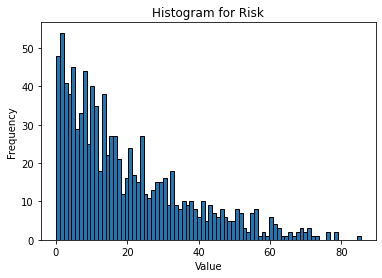

In [1583]:
target = df["Risk"]
plt.hist(target, edgecolor="black", bins=80)
plt.title(f'Histogram for Risk')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Increasing the number of bins such that each value has its own bin
# On this histogram, we can see a potential outlier to the right of the value 80. This would align
# with what we saw in the describe table, as the maximum number of the "Risk" value was 85.4 which
# indicates extremly high risk

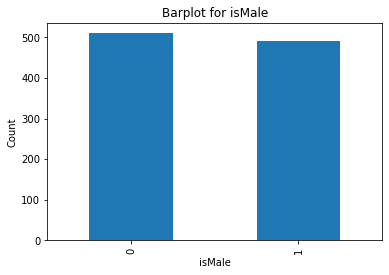

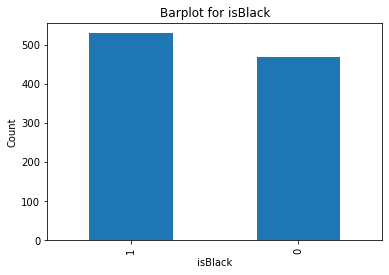

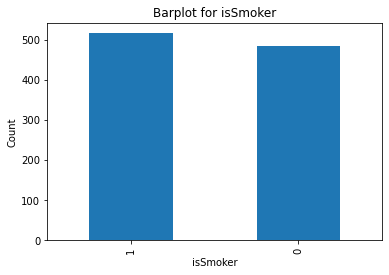

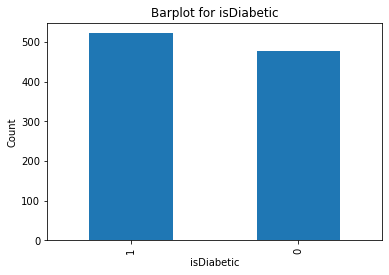

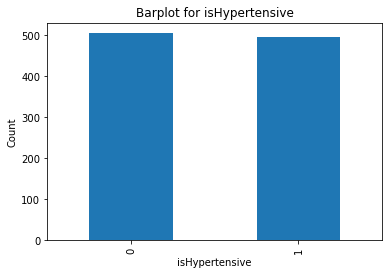

In [1584]:
for categorical_feature in df[categorical_features]:
    df[categorical_feature].value_counts().plot(kind='bar')
    plt.title(f'Barplot for {categorical_feature}')
    plt.xlabel(categorical_feature)
    plt.ylabel('Count')
    plt.show()

# It is visible, that we have roughly an equal number of observations in each class

#### Now, we can start creating our regression model

In [1585]:
# Given the noticable correlation observed between our 'Age' variable and the target variable, we will assess its predictive accuracy 
# to understand its effectiveness as a predictor

X = df.Age.values.reshape(-1, 1)
y = target.values.reshape(-1, 1)


In [1586]:
model = LinearRegression()

In [1587]:
model.fit(X, y)

LinearRegression()

In [1588]:
# Generating new, evenly spaced data points based on the range of the "age" values, and using the trained
# model to predict the corresponding target values

X_new = np.linspace(min(X), max(X), 1000)
y_pred = model.predict(X_new)

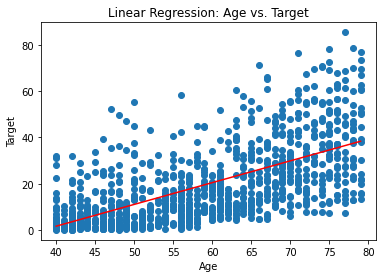

In [1589]:
plt.scatter(X, y)
plt.plot(X_new, y_pred, color="r")
plt.title('Linear Regression: Age vs. Target')
plt.xlabel('Age')
plt.ylabel('Target')
plt.show()

In [1590]:
# Evaluating model performance

mse = mean_squared_error(y_pred, y)
print('Mean squared error: ', mse)

mae = mean_absolute_error(y_pred, y)
print('Mean absolute error: ', mae)


Mean squared error:  405.95754572455525
Mean absolute error:  16.033225713725216


In [1591]:
# Let's see if splitting our data will improve our model's performance

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

In [1592]:
model = LinearRegression()

In [1593]:
model.fit(X_train, y_train)

LinearRegression()

In [1594]:
y_pred = model.predict(X_test)

In [1595]:
# Evaluating the performance on testing set

mse = mean_squared_error(y_pred, y_test)
print('Mean squared error: ', mse)

mae = mean_absolute_error(y_pred, y_test)
print('Mean absolute error: ', mae)


# We can see that both metrics improved, but still are not good
# The improvement in performance metrics when splitting the data into training and test sets is not due to the split 
# itself but rather because the model is being evaluated on a separate dataset that it has not seen during training, 
# providing a more realistic assessment of its generalization capabilities.


Mean squared error:  178.07002804721657
Mean absolute error:  10.08527369331942


In [1596]:
# Let's check the metrics on our training set

y_pred_train = model.predict(X_train)

mse_train = mean_squared_error(y_pred_train, y_train)
print('Mean squared error: ', mse_train)

mae_train = mean_absolute_error(y_pred_train, y_train)
print('Mean absolute error: ', mae_train)


# The metrics are also bad on the training set, which suggests that our model is underfitting the data
# and cannot effectively capture the patterns or relationships within the training data

Mean squared error:  170.60762996735792
Mean absolute error:  9.964329921469902


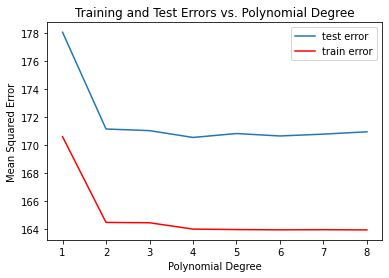

In [1597]:
# To improve the model's performance, we can try Polynomial Regression

# Creating separate dictionaries for test and train errors

test_errors = {}
train_errors = {}

for order in range(1,9):
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculating the prediction errors on train and test sets separately
    y_pred_test = model.predict(X_test)
    test_errors[order] = mean_squared_error(y_pred_test, y_test)

    y_pred_train = model.predict(X_train)
    train_errors[order] = mean_squared_error(y_pred_train, y_train)

# Plotting those errors
plt.plot(test_errors.keys(), test_errors.values(), label='test error')
plt.plot(train_errors.keys(), train_errors.values(), c='r', label='train error')
plt.title("Training and Test Errors vs. Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.show()


# It is visible, that for both our training and testing sets the mse decreases as the polynomial degree
# increases. The biggest difference is seen between the degree 1 and degree 2
# Based on those results, we can say that higher degree Polynomial Regression performs better, but still
# this performance is not really good

In [1598]:
# We can try to use more features

X = df.drop("Risk",axis=1)

In [1599]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44)

In [1600]:
model = LinearRegression()

In [1601]:
model.fit(X_train, y_train)

LinearRegression()

In [1602]:
y_pred = model.predict(X_test)

In [1603]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: ', mae)


# We can see that our performance improved when using all of our features. 
# Using more features can increase the complexity of the model. 
# This increased complexity allows the model to capture more intricate relationships and patterns in the data

Mean squared error:  60.19499210274325
Mean absolute error:  5.848436002790671


#### Now, let's dig a bit into theoretical aspect of Linear Regression

Model coefficients:  [[ 4.26111358  2.93962257  8.97417331 10.54315056  4.87880662  0.89901322
   0.21301179  0.06388058 -0.10811064]]
Model intercept:  [-84.20307393]


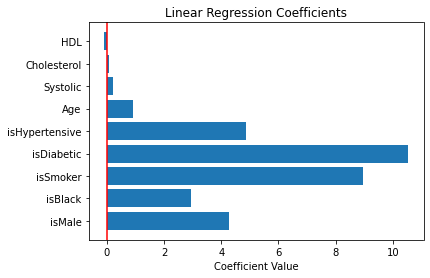

In [1604]:
# Here, we will use our latest model, that was created based on the whole dataset

# Obtain the model coefficients and the intercept
print("Model coefficients: ", model.coef_)
print("Model intercept: ", model.intercept_)

# Visualize the model coefficients
plt.barh(np.array(X.columns), model.coef_[0])
plt.xlabel('Coefficient Value')
plt.title('Linear Regression Coefficients')
plt.axvline(x=0, color='red', linestyle='-')
plt.show()

# Looking at our coefficients, it is visible that categorical features have stronger influence on the 
# predicted outcome, especially "isDiabetic" and "isSmoker"

In [1605]:
# Checking how shifting our target will change the performance 

shifted_train_target = y_train + 100
shifted_test_target = y_test + 100


In [1606]:
model.fit(X_train, shifted_train_target)

LinearRegression()

In [1607]:
y_pred_shifted = model.predict(X_test)

In [1608]:
mse = mean_squared_error(shifted_test_target, y_pred)
print('Mean squared error: ', mse)

mae = mean_absolute_error(shifted_test_target, y_pred)
print('Mean absolute error: ', mae)

# As expected, the performance has significantly dropped. We can fix that by adding bias term to our
# feature matrix

Mean squared error:  9910.039707649285
Mean absolute error:  99.24922357773272


In [1609]:
# Creating a bias column
new_train_column = np.ones((X_train.shape[0],1))

# This operation stacks the new column to the right of the original array
train_with_bias = np.hstack((X_train, new_train_column))


new_test_column = np.ones((X_test.shape[0],1))
test_with_bias = np.hstack((X_test, new_test_column))

In [1610]:
model.fit(train_with_bias, shifted_train_target)

LinearRegression()

In [1611]:
y_pred_with_bias = model.predict(test_with_bias)

In [1612]:
mse = mean_squared_error(shifted_test_target, y_pred_with_bias)
print('Mean squared error: ', mse)

mae = mean_absolute_error(shifted_test_target, y_pred_with_bias)
print('Mean absolute error: ', mae)

# Our metrics returned to their original state

Mean squared error:  60.19499210274322
Mean absolute error:  5.848436002790672


#### We can try to improve the model's performance even more. For that purpose we will use standardization. Standardization ensures that all features have a similar scale. This is particularly important for algorithms that rely on distances between data points, such as gradient descent in linear regression. Features with larger scales might dominate the optimization process, leading to suboptimal convergence.

In [1613]:
# Using StandardScaler for feature scaling
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

df

,isMale,isBlack,isSmoker,isDiabetic,isHypertensive,Age,Systolic,Cholesterol,HDL,Risk
0,1,1,0,1,1,-0.876528,-1.361803,0.834509,-1.157282,-0.502893
1,0,0,0,1,1,0.857969,0.716372,-0.445036,-0.025281,0.612430
2,0,1,1,1,1,-0.789803,1.157197,-0.838742,-0.025281,1.052689
3,1,1,1,1,0,-1.483602,0.023647,0.096310,-0.570319,-0.379621
4,0,0,1,0,1,0.597794,-0.322715,1.720348,0.142422,-0.268089
...,...,...,...,...,...,...,...,...,...,...
995,1,0,1,1,1,-1.483602,-1.078415,0.539230,0.310126,-0.925542
996,0,1,0,1,0,1.378318,-0.669078,-1.675367,-0.151059,0.248482
997,1,1,1,0,1,1.465043,1.062735,0.736083,-1.241134,2.443908
998,0,1,1,1,0,0.511069,-0.165278,0.243950,0.268200,0.741573


In [1614]:
X_standardized = df.drop("Risk", axis=1)
y_standardized = df.Risk.values.reshape(-1, 1)

In [1615]:
X_train, X_test, y_train, y_test = train_test_split(X_standardized, y_standardized, test_size=0.3, random_state=44)

In [1616]:
model.fit(X_train, y_train)

LinearRegression()

In [1617]:
y_pred = model.predict(X_test)

In [1618]:
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error: ', mse)

mae = mean_absolute_error(y_test, y_pred)
print('Mean absolute error: ', mae)

# It is visible, that our metrics improved very much! Standardization as a preprocessing step notably enhanced the performance of the model.
# What is interesting, is that MAE is higher, it suggests that the  model tends to make predictions with smaller errors, 
# but these errors occur more frequently across the dataset

Mean squared error:  0.2074220041138457
Mean absolute error:  0.34331041127632533


#### Basically, the goal of linear regression is to find the values of slope and the intercept that will give us the best fitting line. The best approach for finding those values is gradient descent. Gradient Descent Method is based on iterative moving in the direction opposite to gradient(biggest increase of function), and by these means approaching the minimum.

#### We can try to visualize how does the gradient descent work

In [1619]:
def gradient(b, X, y):
    return (np.dot(2 * np.transpose(X), (np.dot(X, b) - y))) / len(y)

def gradient_descent_step(b, X, y, lr):
    b = b - gradient(b, X, y) * lr
    return b


In [1626]:
# Working with only two features, as a 2D contour plot is easy to interpret and visualize 
X = df[['Age', 'Systolic']].values.reshape(-1, 2)
y = df.Risk.values.reshape(-1,1)

X_standardized = scaler.fit_transform(X)
y_standardized = scaler.fit_transform(y)

In [1658]:
def gradient_contourplot(learning_rate, X_standardized, y_standardized, num_steps):
    nb_of_bs = 101 
    b1 = np.linspace(-4, 4, num=nb_of_bs)
    b2 = np.linspace(-4, 4, num=nb_of_bs)
    b_x, b_y = np.meshgrid(b1, b2)
    cost_arr = np.zeros((nb_of_bs, nb_of_bs))

    for i in range(nb_of_bs):
        for j in range(nb_of_bs):
            # Use the predict function to get predictions based on the current slope and intercept
            predictions = b_x[i, j] * X_standardized[:, 0] + b_y[i, j] * X_standardized[:, 1]
            
            # Calculate the mean squared error (cost)
            cost_arr[i, j] = mean_squared_error(y_standardized, predictions)

    plt.figure(figsize=(15, 10)) 
    plt.contourf(b_x, b_y, np.log(cost_arr), 20, alpha=0.9)
    cbar = plt.colorbar()        

    b_vector = np.array([[3.], [1.]])

    gradients = []
    gradients.append(b_vector)

    for i in range(num_steps):
        computed_grad = gradient_descent_step(b_vector, X_standardized, y_standardized, learning_rate)
        gradients.append(computed_grad)
        b_vector = computed_grad

    gradients = np.array(gradients)

    plt.plot(gradients[:, 0], gradients[:, 1], c='b')
    plt.scatter(gradients[:, 0], gradients[:, 1], label='GD steps', c='b')

    for i, txt in enumerate(range(num_steps+1)):
        plt.text(gradients[i, 0], gradients[i, 1], f'w({txt})', color='black', fontsize=8, ha='right', va='bottom')
        
    cbar.ax.set_ylabel('log(cost)')
    plt.xlabel("Age weight")
    plt.ylabel("Systolic weight")
    plt.legend()
    plt.show()

#### A very important parameter in gradient descent method is learning rate - it defines the size of our step in the algorithm - how fast we are approaching our minimum. A higher learning rate can lead to faster convergence, but it may risk overshooting the minimum. Conversely, a lower learning rate may converge slower but with greater precision. 
#### The examples below show how various learning rates influence the convergence 

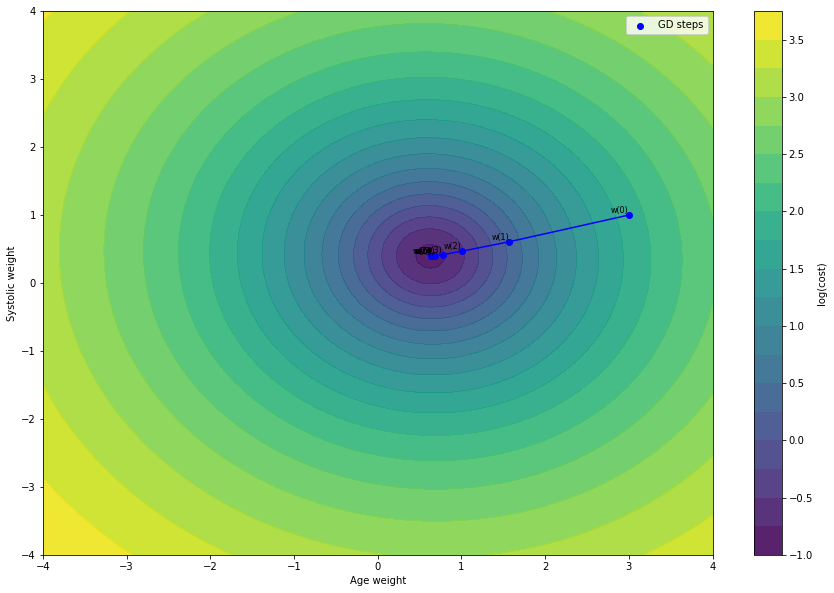

In [1663]:
gradient_contourplot(0.3, X_standardized, y_standardized, 7)

# This learning rate appears to be an optimal choice for our example, as it takes only 5 steps to get to the minimum

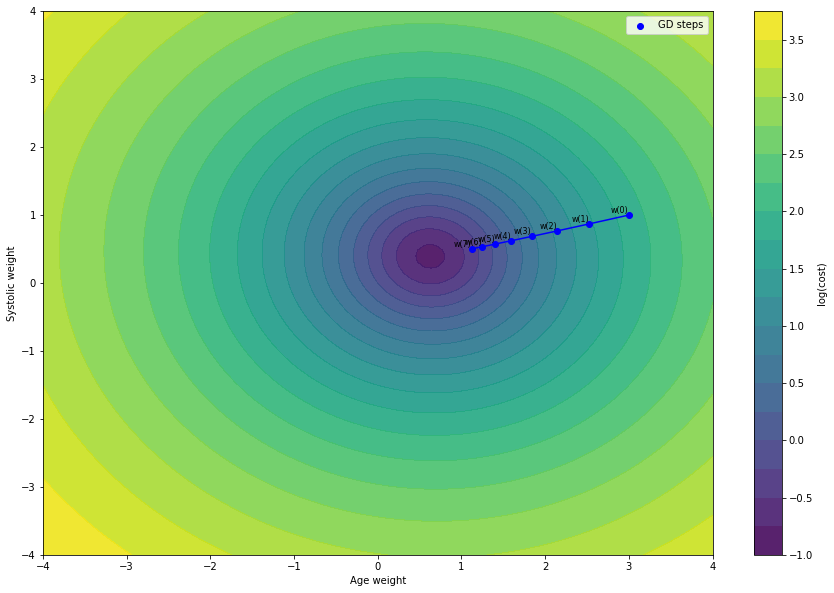

In [1664]:
gradient_contourplot(0.1, X_standardized, y_standardized, 7)

# Fails to converge! The steps are to small

# To fix this we can consider plotting higher number of GD steps

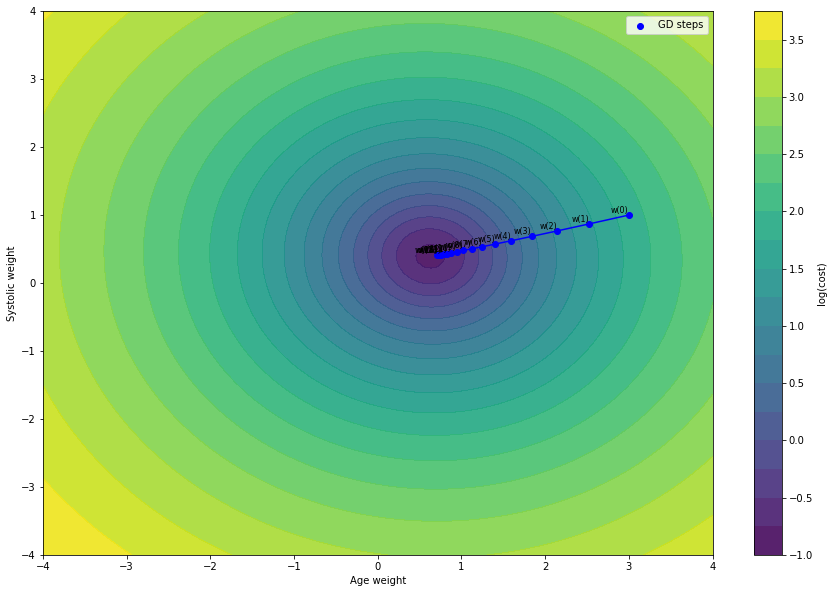

In [1661]:
gradient_contourplot(0.1, X_standardized, y_standardized, 15)

# As expected, higher number of steps proved to be effective in achieving convergence. 
# However, contrasting this with the previous example where a higher learning rate resulted in convergence in just 5 steps 
# shows the importance of fine-tuning hyperparameters for achieving efficient results

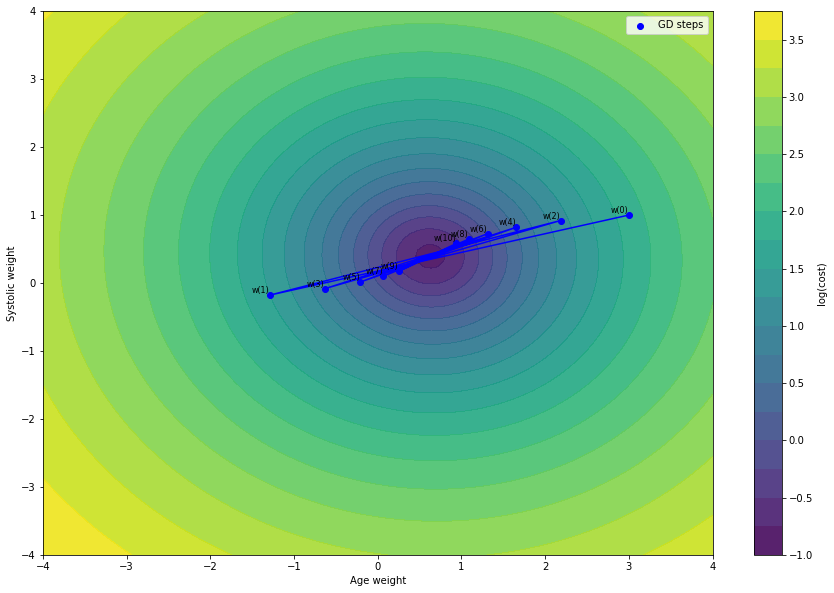

In [1669]:
gradient_contourplot(0.9, X_standardized, y_standardized, 10)

# Overshoots the minimum multiple times, as the steps are too big, and fails to converge!